案件假設：

1. 租賃公司需保留現有品牌，以維持品牌多樣性。
2. 承租人只在乎品牌。 ---> 租賃公司可以汰換某品牌較高碳排者，再購入相同品牌但碳排低者
3. 租賃公司資料缺少碳排數據、油耗數據

程式邏輯：

1. 訓練資料其實沒有一定的答案。例如：甲想要篩出的是各品牌碳排的前10%。乙想要的是各品牌碳排前30%，但同時要壓在100台左右。丙想要的是各車型碳排的前30%。
2. 

# GUI_匯入企業資料，選擇目標

In [1]:
#套件
import tkinter as tk # Gui
from tkinter import filedialog, ttk, messagebox
import pandas as pd # 資料處理 
import re # 字串切割

selected_class = None
percent_value = None
num_value = None
range_value = None

# 讀取 CSV
def open_file():
    global df_formal
    file_path = filedialog.askopenfilename(title = "選擇 CSV 檔案", filetypes = [("CSV files", "*.csv")])
    if file_path:
        try:
            df_formal = pd.read_csv(file_path)
            show_main_menu()
        except pd.errors.EmptyDataError:
            show_failure_frame()

# 讀取失敗介面
def show_failure_frame():
    failure_frame = tk.Toplevel(root)
    failure_label = tk.Label(failure_frame, text = "存儲失敗，請選擇有效的 CSV 檔案")
    failure_label.pack(pady = 40)
    exit_button = tk.Button(failure_frame, text = "離開", command = root.destroy)
    exit_button.pack(pady = 20)

# 讀取成功後，顯示操作介面
def show_main_menu():
    
    # 下拉選單
    global main_menu_frame
    main_menu_frame = tk.Toplevel(root)
    main_menu_label = tk.Label(main_menu_frame, text="選擇汰換模式")
    main_menu_label.pack(pady=20)

    choices = [
        "汰換每一種 'Make' 前X%高碳排者，上限N台",
        "汰換每一種 'Model' 前X%高碳排者，上限N台",
        "汰換每一種 'Vehicle Class' 前X%高碳排者，上限N台",
        "汰換每一種 'Engine Size(L)' 前X%高碳排者，上限N台",
        "汰換每一種 'Cylinders' 前X%高碳排者，上限N台",
        "汰換每一種 'Transmission' 前X%高碳排者，上限N台",
        "汰換每一種 'Fuel Type' 前X%高碳排者，上限N台",
    ]

    choice_var = tk.StringVar()
    choice_dropdown = ttk.Combobox(main_menu_frame, textvariable=choice_var, values=choices, width=50)
    choice_dropdown.pack(pady=20)
    
    # 填寫數字
    percent_label = tk.Label(main_menu_frame, text="淘汰%")
    percent_label.pack(pady=10)
    percent_entry = tk.Entry(main_menu_frame)
    percent_entry.pack(pady=10)

    num_label = tk.Label(main_menu_frame, text="欲淘汰數量")
    num_label.pack(pady=10)
    num_entry = tk.Entry(main_menu_frame)
    num_entry.pack(pady=10)
    
    range_label = tk.Label(main_menu_frame, text="擴張值α，建議從0.02，當產出太少時可增加此數")
    range_label.pack(pady=10)
    range_entry = tk.Entry(main_menu_frame)
    range_entry.pack(pady=10)

    # 確定按鈕
    submit_button = tk.Button(main_menu_frame, text="確定",
                              command=lambda: process_selection(choice_var.get(), percent_entry.get(), 
                                                                num_entry.get(),range_entry.get()))
    submit_button.pack(pady=20)

# 回傳變數
def process_selection(choice, percent, n, range_):
    
    #宣告全域變數才能傳出
    global selected_class, percent_value, num_value, range_value

    # 資料條件檢驗
    try:
        if not (0 < float(percent) < 100) or not (0 < float(range_) < 1):
            raise ValueError("百分比必須大於0且小於100，α必須大於0小於1")
        
        # 通過後，回傳浮點數型態
        else:
            percent_value = float(percent)
            range_value = float(range_)
        
        if not (int(n) > 0):
            raise ValueError("數量必須大於0")
            
        # 通過後，回傳整數型態
        else:
            num_value = int(n)
            
    #若驗證未過，顯示error資訊    
    except ValueError as e:
        show_error_message(str(e))
        return

    # 切割字串，回傳class
    selected_class = extract_class_from_choice(choice)
    if selected_class is not None:
        print("選擇的 Class:", selected_class)
    else:
        print("無法提取選擇的 Class")

    # 列印回傳資料
    print("填寫%:", percent_value, 
          "填寫數字:", num_value,
          "填寫α:", range_value)
    

    root.destroy()

# 切割class字串出來
def extract_class_from_choice(choice):
    match = re.search(r"'([^']*)'", choice)
    return match.group(1) if match else None

# 顯示錯誤訊息
def show_error_message(message):
    error_frame = tk.Toplevel(root)
    error_label = tk.Label(error_frame, text=message)
    error_label.pack(pady=40)
    exit_button = tk.Button(error_frame, text="關閉", command=error_frame.destroy)
    exit_button.pack(pady=20)

# 執行
root = tk.Tk()
root.title("選擇 CSV 檔案")

open_button = tk.Button(root, text="選擇 CSV 檔案", command=open_file)
open_button.pack(pady=20)

# 設置視窗高度寬度
root.geometry("500x200")
root.mainloop()

# 印出匯入資料
print(df_formal)

選擇的 Class: Make
填寫%: 30.0 填寫數字: 100 填寫α: 0.02
     Model Year   Make              Model  Vehicle Class  Engine Size(L)  \
0          2022  Acura                ILX        Compact             2.4   
1          2022  Acura         MDX SH-AWD     SUV: Small             3.5   
2          2022  Acura         RDX SH-AWD     SUV: Small             2.0   
3          2022  Acura  RDX SH-AWD A-SPEC     SUV: Small             2.0   
4          2022  Acura         TLX SH-AWD        Compact             2.0   
..          ...    ...                ...            ...             ...   
941        2022  Volvo        XC40 T5 AWD     SUV: Small             2.0   
942        2022  Volvo        XC60 B5 AWD     SUV: Small             2.0   
943        2022  Volvo        XC60 B6 AWD     SUV: Small             2.0   
944        2022  Volvo        XC90 T5 AWD  SUV: Standard             2.0   
945        2022  Volvo        XC90 T6 AWD  SUV: Standard             2.0   

     Cylinders Transmission Fuel Type  Fu

# 套件

In [2]:
# ML套件
from sklearn.model_selection import train_test_split # 切割訓練資料
from sklearn.ensemble import RandomForestClassifier # 隨機森林套件
from sklearn.model_selection import GridSearchCV # 網格搜索

from sklearn.model_selection import cross_val_score  # 交互驗證 
from sklearn.model_selection import cross_val_predict # 交互驗證的混淆矩陣、分類報告

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
# 產生精確度及二元分類模型的分類報告和混淆矩陣

# 讀取資料
df = pd.read_csv('TEST_ML_BIG.csv')  # 請將'your_data.csv'替換為實際的資料檔案名稱

# 標籤

In [3]:
'''各XX前x%高碳排的汽車進行標籤，且最多標n台'''
def filter1_find_eachTarget_front_Xpercent(df, target, x, n, r):  
# x是希望抓各品牌前x%, n是希望淘汰數量, r是用在貪婪函式的擴張範圍
    
    # 計算每個 Make 的 CO2 emissions 的閾值
    thresholds = df.groupby(target)['CO2 Emissions(g/km)'].quantile(1-x/100)  #因碳排前高者為大數字，故從後面開始抓

    # lambda定義一個拋棄式函數，將每個 Make 的後x% 設置為 1，其餘為 0
    # 新增 To_Eliminate 欄位，標記後x% 為 1
    df['To_Eliminate'] = df.apply(lambda row: 1 if row['CO2 Emissions(g/km)'] >= thresholds[row[target]] else 0, axis=1)

    
    '''貪婪演算法函式，以免淘汰車輛超過指定數量輛n台'''
    greedy(df, n, r)  
    # 微調轉換數量上限，使得產出結果能大於100台，讓使用者自行決定不淘汰之車輛。

    '''印出標籤明細'''
    to_eliminate_rows = df[df['To_Eliminate'] == 1]
    print("\n標籤車輛之明細：", )
    for i in to_eliminate_rows['CO2 Emissions(g/km)']:
        print(i,end = ', ')
        
'''貪婪演算法，確保篩選數量在使用者規定內的同時，能最大化省碳效益'''
def greedy(df, n, range_):
    # 計算"To_Eliminate"列中值為1的數量。To_Eliminate只有0跟1，1的sum就是有1的數量
    count_to_determine = df['To_Eliminate'].sum()

    # 如果數量超過100，則將最小的碳排車輛標籤轉換為0
    n = int(n * (1 + range_)) # 剛剛好的話很容易因為誤差問題而少淘汰，故可以多淘汰而進一步篩選。
    if count_to_determine > n:
        
        df_to_switch = df[df['To_Eliminate'] == 1]

        # 根據 CO2 Emissions(g/km) 進行排序，選出最小的那幾輛
        df_to_switch = df_to_switch.sort_values(by = 'CO2 Emissions(g/km)').head(count_to_determine - n)

        # 將選出的To_Eliminate列的值轉換為 0
        df.loc[df_to_switch.index, 'To_Eliminate'] = 0

In [4]:
filter1_find_eachTarget_front_Xpercent(df, selected_class, float(percent_value), 
                                       int(num_value)/len(df_formal)*len(df), float(range_value))


標籤車輛之明細：
608, 608, 354, 489, 498, 498, 383, 379, 395, 356, 356, 325, 325, 363, 374, 387, 346, 356, 345, 353, 355, 349, 329, 345, 352, 352, 385, 366, 345, 353, 345, 353, 339, 352, 359, 352, 368, 329, 345, 352, 385, 345, 353, 345, 353, 465, 331, 331, 331, 325, 330, 385, 355, 362, 341, 347, 326, 380, 358, 327, 359, 347, 327, 339, 361, 364, 381, 327, 332, 336, 354, 327, 332, 327, 354, 341, 347, 326, 380, 358, 327, 359, 347, 329, 338, 360, 381, 327, 332, 327, 354, 327, 332, 336, 354, 392, 339, 339, 350, 354, 365, 336, 337, 364, 364, 364, 364, 343, 360, 331, 326, 343, 330, 345, 326, 326, 326, 348, 349, 349, 348, 334, 355, 335, 354, 328, 329, 326, 344, 357, 359, 370, 395, 331, 331, 326, 328, 328, 336, 343, 337, 361, 361, 328, 328, 349, 325, 383, 379, 395, 364, 364, 364, 364, 608, 608, 347, 368, 352, 436, 355, 349, 335, 371, 392, 325, 326, 343, 326, 349, 364, 327, 339, 352, 327, 327, 352, 325, 339, 352, 359, 352, 368, 331, 363, 410, 336, 331, 329, 358, 329, 331, 327, 344, 357, 359, 370, 460, 

# Kmeans

In [5]:
'''使機器自動辨別各資料間的關聯，再依可能較相關之資料群進行分群'''

# ML套件
from sklearn.cluster import KMeans

def kmeans_(df):
    
    included = ['Engine Size(L)', 'Cylinders']
    X = df[included]

    model = KMeans(n_clusters = 10, n_init='auto', random_state=1)  # 預計分為10群，迭代次數由模型自行定義
    model.fit(X)  # 建立模型

    df['Cluster'] = model.labels_  #將分類結果加回df
    
    return df

In [6]:
# 將訓練資料進行分群，增加可學習特徵，以提高預測準確度
df = kmeans_(df)

D:\Anaconda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Anaconda\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


# 特徵工程_方差過濾器 (Variance Threshold)

In [7]:
from sklearn.feature_selection import VarianceThreshold


'''納入油耗數據'''
columns_to_include = ['Engine Size(L)', 'Cylinders','Cluster']  # 選取特徵資料名稱
X = df[columns_to_include]
y = df["CO2 Emissions(g/km)"]


# 讓機器挑選特徵
selector = VarianceThreshold(threshold = 0.1) # 特徵選擇工具，用來過濾掉方差低於某一閾值的x變數
X_selected = selector.fit_transform(X) 

selected_feature_indices = selector.get_support(indices=True)

# 根據索引提取被選擇的特徵名稱
selected_feature_names = X.columns[selected_feature_indices]

# print被選擇的特徵名稱
print("被選擇的特徵：", selected_feature_names)

被選擇的特徵： Index(['Model Year', 'Engine Size(L)', 'Cylinders', 'Cluster'], dtype='object')


# 模型建立、訓練、評估準確度；產出混淆矩陣和分類報告

In [8]:
X = df[selected_feature_names]
y = df['To_Eliminate']

# 分割資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定義超參數範圍
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 創建隨機森林分類器
model = RandomForestClassifier(random_state=42)

# 使用網格搜索進行超參數調整
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# 打印最佳超參數
print("Best Parameters: ", grid_search.best_params_)

# 使用最佳超參數的模型進行預測
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 評估最佳模型的性能
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy with Best Model: {accuracy}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy with Best Model: 0.9140173410404624
Confusion Matrix:
 [[1197   45]
 [  74   68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1242
           1       0.60      0.48      0.53       142

    accuracy                           0.91      1384
   macro avg       0.77      0.72      0.74      1384
weighted avg       0.91      0.91      0.91      1384



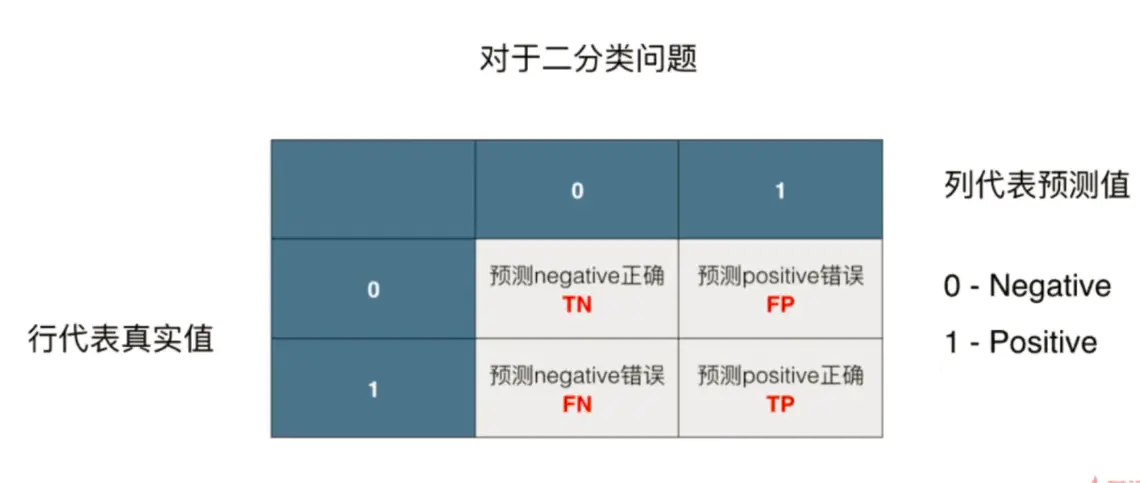

1. True Positive (TP): 有51個實際為1（要淘汰），且模型正確預測為1。
2. True Negative (TN): 有175個實際為0（不淘汰），且模型正確預測為0。
3. False Positive (FP): 有1個實際為0（不淘汰），但模型誤將其預測為1。
4. False Negative (FN): 沒有實際為1（要淘汰），但模型誤將其預測為1。

1. Precision: 預測為1的樣本中，有98%是真正要淘汰的車輛。
2. Recall (Sensitivity): 實際要淘汰的車輛中，有100%被模型成功找出。
3. F1-Score: Precision和Recall的調和平均數，是一個綜合考慮Precision和Recall的指標。
4. Support: 每個類別的實際樣本數。
5. Accuracy: 整體預測的正確率，這裡是1.00表示100%正確預測。

總體來說，這個模型在測試集上表現非常好，具有高的準確性、高的Precision和Recall，但請注意，這樣的結果也可能是由於類別不平衡所致，即"不要淘汰"的樣本比"要淘汰"的樣本多。在實際應用中，需要進一步確保模型的穩健性和泛化性。

# RESULT: input, prediction and output

In [9]:
def predict_NoFA(df):
    
    # 分群函式
    kmeans_(df)
    
    # 特徵放入X
    input_X = df[selected_feature_names]

    # 進行預測
    predictions = best_model.predict(input_X)

    # 將預測結果加入新的資料集
    df['To_Eliminate'] = predictions
    return df

In [10]:
def output_(df):

    # 计算 To_Eliminate 为 1 的项的 CO2 Emissions(g/km) 加总
    Q_eliminate = df['To_Eliminate'].sum()
    sum_co2_to_eliminate = df.loc[df['To_Eliminate'] == 1, 'CO2 Emissions(g/km)'].sum()
    average_co2_to_eliminate = df.loc[df['To_Eliminate'] == 1, 'CO2 Emissions(g/km)'].mean()

    # 印出淘汰數量，節省加總，節省平均
    print("欲淘汰數量：", Q_eliminate,"輛"
          f"\n節省 CO2 Emissions 加總：{sum_co2_to_eliminate}g/km"
          f"\n節省 CO2 Emissions 平均：{round(average_co2_to_eliminate, 2)}g/km"
          f"\n節省 CO2 Emissions 每年{sum_co2_to_eliminate*10000/1000000}噸，",
          f"大約等於 {round(sum_co2_to_eliminate*41.1*1.6*365/1000000/189, 2)} 公頃的樟樹固碳能力")   
            # 交通部統計：每次41.1km，每天1.6次 = 每年2.4萬公里

    # 印出淘汰碳排明細
    to_eliminate_rows = df[df['To_Eliminate'] == 1]
    print("\n欲淘汰車輛之碳排明細：", )
    for i in to_eliminate_rows['CO2 Emissions(g/km)']:
        print(i,end = ', ')
    
    # 將報告保存為CSV文件
    df.to_csv('FinalData_eliminated_cars_report.csv', index=False)
    print()

# 根據企業資料，反饋淘汰資料

In [11]:
predict_NoFA(df_formal)
output_(df_formal)  # 程式碼在標籤那裏

欲淘汰數量： 110 輛
節省 CO2 Emissions 加總：39125g/km
節省 CO2 Emissions 平均：355.68g/km
節省 CO2 Emissions 每年391.25噸， 大約等於 4.97 公頃的樟樹固碳能力

欲淘汰車輛之碳排明細：
383, 379, 395, 373, 354, 522, 608, 608, 346, 356, 345, 353, 281, 296, 355, 349, 297, 341, 321, 314, 304, 347, 326, 380, 358, 327, 359, 314, 347, 327, 339, 361, 364, 381, 329, 345, 352, 352, 385, 366, 327, 332, 336, 354, 345, 353, 327, 332, 327, 354, 345, 353, 305, 325, 305, 325, 339, 352, 359, 352, 305, 305, 368, 363, 392, 341, 321, 314, 305, 347, 326, 380, 358, 327, 359, 318, 347, 329, 338, 360, 381, 329, 345, 352, 385, 327, 332, 327, 354, 345, 353, 327, 332, 336, 354, 345, 353, 355, 374, 387, 489, 498, 498, 337, 348, 349, 349, 348, 362, 465, 


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### Testing

In [12]:
# 計算每個 Make 的 CO2 emissions 的閾值
thresholds = df_formal.groupby(selected_class)['CO2 Emissions(g/km)'].quantile(int(1-float(percent_value)/100))  
#因碳排前高者為大數字，故從後面開始抓

# lambda定義一個拋棄式函數，將每個 Make 的後x% 設置為 1，其餘為 0
# 新增 To_Eliminate 欄位，標記後x% 為 1
df_formal['right_label'] = df_formal.apply(lambda row: 
                                           1 if row['CO2 Emissions(g/km)'] >= thresholds[row[selected_class]] 
                                           else 0, axis=1)

    
'''貪婪演算法函式，以免淘汰車輛超過指定數量輛n台'''
# 計算"To_Eliminate"列中值為1的數量。To_Eliminate只有0跟1，1的sum就是有一個數量
count_to_determine = df_formal['right_label'].sum()

# 如果數量超過100，則將最小的碳排車輛標籤轉換為0
n = len(df_formal[df_formal['To_Eliminate'] == 1]) # 剛剛好的話很容易因為誤差問題而少淘汰，故可以多淘汰而進一步篩選。
if count_to_determine > n:
        
    df_to_switch = df_formal[df_formal['right_label'] == 1]

    # 根據 CO2 Emissions(g/km) 進行排序，選出最小的那幾輛
    df_to_switch = df_to_switch.sort_values(by = 'CO2 Emissions(g/km)').head(count_to_determine - n)

    # 將選出的To_Eliminate列的值轉換為 0
    df_formal.loc[df_to_switch.index, 'right_label'] = 0

In [13]:
print('~Testing Report~\n')

# 與標籤相同之程度
different_values_count = (df_formal['To_Eliminate'] != df_formal['right_label']).sum()
print(f"testing模型準確度: {round((1-(different_values_count)/len(df_formal))*100,3)}%")

# 混淆矩陣及分類報告
print("Confusion Matrix:\n", confusion_matrix(df_formal['right_label'], df_formal['To_Eliminate']))  # 後為預測
print("\nClassification Report:\n", classification_report(df_formal['right_label'], df_formal['To_Eliminate']))

~Testing Report~

testing模型準確度: 92.6%
Confusion Matrix:
 [[801  35]
 [ 35  75]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       836
           1       0.68      0.68      0.68       110

    accuracy                           0.93       946
   macro avg       0.82      0.82      0.82       946
weighted avg       0.93      0.93      0.93       946

